In [25]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy
matplotlib.rcParams['figure.figsize'] = (12, 8)

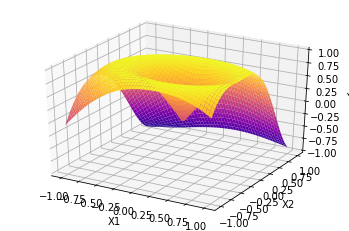

In [26]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [27]:
# %matplotlib tk

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(X1, X2, Y, cmap='plasma')
# # ax.scatter(X1, X2, Y)
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('Y')
# plt.show()

### Using Neural Network

In [28]:
n_hidden = 4
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(2, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)

# def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
#     pass

In [29]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.5859900064442416


100 Error =  0.09623944845201828


200 Error =  0.051163194949613536


300 Error =  0.031811425997820615


400 Error =  0.026970647103367777


500 Error =  0.025701653639593248


600 Error =  0.025194020143821626


700 Error =  0.024982586659992624


800 Error =  0.024859400221026128


900 Error =  0.024768934765530305


1000 Error =  0.024627568046286887


1100 Error =  0.024523821699299873


1200 Error =  0.024372396919724988


1300 Error =  0.024195436929224157


1400 Error =  0.024005585682878715


1500 Error =  0.023824200993523777


1600 Error =  0.023647475484899438


1700 Error =  0.023338103655160217


1800 Error =  0.02133658551807249


1900 Error =  0.020226153390110403


2000 Error =  0.018910231392793374


2100 Error =  0.01805366891225227


2200 Error =  0.017897128710210188


2300 Error =  0.017869340164906346


2400 Error =  0.017856229759928465


2500 Error =  0.017850516965515394


2600 Error =  0.01784825154634903


2700 Error =  0.017

TclError: invalid command name "pyimage58"

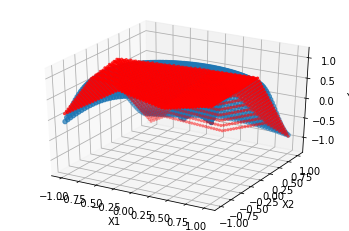

In [30]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [31]:
layer1.weights, layer1.bias

(array([[-0.76777123,  1.93260496,  0.98193293, -2.11243423],
        [-1.53340038,  0.29111983,  0.61701501,  2.60494821]]),
 array([ 0.92018372, -0.41195067,  0.84769854, -1.17559551]))

## Factorize the final weights

In [32]:
layer2.weights.shape

(8, 1)

In [33]:
n_hidden2 = 2
optimizer = tnn.SGD()

# w2 = np.random.normal(size=(n_hidden,n_hidden2))
w2_layer = tnn.WeightsLayer(n_hidden*2, n_hidden2, optimizer=optimizer)
w3_layer = tnn.WeightsLayer(n_hidden2, 1, optimizer=optimizer)

In [10]:
for epoch in range(100000):
    wout = w3_layer.forward(w2_layer.weights)
    dw = wout - layer2.weights
    dw2 = w3_layer.backward(dw/dw.shape[1]) 
    w2_layer.del_weights = dw2
    
    w2_layer.update()
    w3_layer.update()
    
    if epoch%10000 == 0:
        error = (dw**2).mean()
        print(epoch, 'Error = ', error)

0 Error =  0.9327833597664397
10000 Error =  1.8878856057482965e-29
20000 Error =  1.8878856057482965e-29
30000 Error =  1.8878856057482965e-29
40000 Error =  1.8878856057482965e-29
50000 Error =  1.8878856057482965e-29
60000 Error =  1.8878856057482965e-29
70000 Error =  1.8878856057482965e-29
80000 Error =  1.8878856057482965e-29
90000 Error =  1.8878856057482965e-29


In [11]:
w2_layer.weights@w3_layer.weights

array([[ 0.20852395],
       [-1.41071616],
       [-0.81872565],
       [ 1.05241564],
       [ 1.31800321],
       [ 0.24208348],
       [ 0.07418615],
       [-0.06926675]])

In [12]:
layer2.weights

array([[ 0.20852395],
       [-1.41071616],
       [-0.81872565],
       [ 1.05241564],
       [ 1.31800321],
       [ 0.24208348],
       [ 0.07418615],
       [-0.06926675]])

In [13]:
layer2.output

array([[ 0.69933484],
       [ 0.7021964 ],
       [ 0.70505795],
       ...,
       [-0.95138571],
       [-0.96682318],
       [-0.98226066]])

In [14]:
new_out = (layer2.zee@w2_layer.weights)@w3_layer.weights + layer2.bias
new_out

array([[ 0.69933696],
       [ 0.70219852],
       [ 0.70506009],
       ...,
       [-0.95138562],
       [-0.96682307],
       [-0.98226053]])

In [15]:
layer2.output - new_out

array([[-2.11768322e-06],
       [-2.12452964e-06],
       [-2.13137606e-06],
       ...,
       [-9.41203805e-08],
       [-1.10036268e-07],
       [-1.25952156e-07]])

##### Making Neural networks with these weights and zero bias on second layer

In [16]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                          weights=copy.deepcopy(layer1.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
# drelu_ = tnn.DoubleRelu()
# layer2_ = tnn.LinearLayer(n_hidden*2,n_hidden2,
#                                     weights=w2_layer.weights,
#                                     optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    weights=copy.deepcopy(w2_layer.weights),
                                    optimizer=optimizer)
layer3_ = tnn.LinearLayer(n_hidden2,1,
                                    weights=copy.deepcopy(w3_layer.weights),
                                    bias = copy.deepcopy(layer2.bias),
                                    optimizer=optimizer)

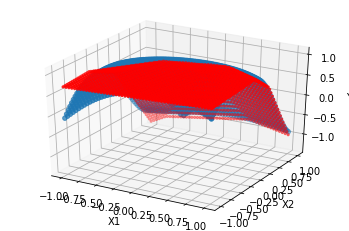

In [17]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [18]:
yout_ - yout

array([[2.68139757e-06],
       [2.69904595e-06],
       [2.71669432e-06],
       ...,
       [1.19840100e-07],
       [1.82176534e-07],
       [2.44512967e-07]])

In [19]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.024633016231929532, 0.024633016336188605)

#### Double Relu Layer from the Linear Layer

In [20]:
optimizer = tnn.Adam()

net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(2, n_hidden,
                          weights=copy.deepcopy(layer1.weights),
                          bias = copy.deepcopy(layer1.bias),
                          optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    weights=copy.deepcopy(w2_layer.weights),
                                    optimizer=optimizer)
layer3_ = tnn.DoubleReluLinearLayer(n_hidden2,1,
                                    weights=np.vstack([w3_layer.weights,w3_layer.weights]),
                                    bias = copy.deepcopy(layer2.bias),
                                    optimizer=optimizer)

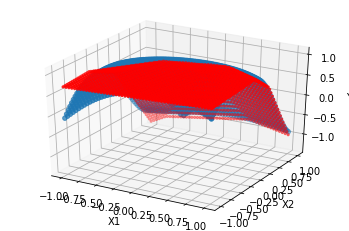

In [21]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [22]:
((yout - yy)**2).mean(), ((yout_ - yy)**2).mean() ## there is little change in error..

(0.024633016231929532, 0.024633016336188605)

## Adding Noise

In [23]:
# noise_old = 0.1
# noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.weights.shape)
# noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_.bias.shape)

# layer1_.weights += noise_old_w1
# layer1_.bias += noise_old_b1

# noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.weights.shape)
# noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_.bias.shape)

# layer2_.weights += noise_old_w2
# layer2_.bias += noise_old_b2

### Training the network

In [24]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_ = net_.forward(xx)
    dy = yout_ - yy
    dx = net_.backward(dy)
    
    net_.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.024633016336188605


100 Error =  0.024383968780248892


200 Error =  0.024236063826866987


300 Error =  0.02417800645361609


400 Error =  0.024139633173954886


500 Error =  0.024073891260995073


600 Error =  0.023994502102342104


700 Error =  0.02388889609666334


800 Error =  0.023802481910068143


900 Error =  0.02373905441736035


1000 Error =  0.02367789243868921


1100 Error =  0.02355606690897988


1200 Error =  0.023517336452586402


1300 Error =  0.023465197624646338


1400 Error =  0.02338080635790379


1500 Error =  0.02339725218211272


1600 Error =  0.023369830850961767


1700 Error =  0.023367719211503435


1800 Error =  0.023410109194965098


1900 Error =  0.023477240078723132


2000 Error =  0.023387942485898525


2100 Error =  0.02336287061235719


2200 Error =  0.02336027705869596


2300 Error =  0.023358662642603768


2400 Error =  0.023357966963412014


2500 Error =  0.023381754066374206


2600 Error =  0.0233545154267527


2700 Error =  0.02337766

TclError: invalid command name "pyimage48"

In [104]:
layer1_.weights, layer1_.bias

(array([[ 0.23875492, -1.43220003,  1.08750632,  1.0545626 ],
        [-1.80634456,  0.47507018,  2.42313759, -1.29265485]]),
 array([ 0.22139735, -0.22709561,  0.61835847, -0.66876917]))

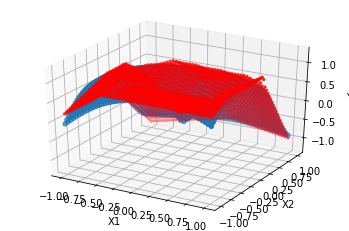

In [105]:
yout_ = net_.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Training the same network from scratch

In [108]:
optimizer = tnn.Adam()

net_0 = tnn.AutoForm(new_layers=True)
layer1_0 = tnn.LinearLayer(2, n_hidden,
                          optimizer=optimizer)
layer2_0 = tnn.DoubleReluLinearLayer(n_hidden, n_hidden2,
                                    optimizer=optimizer)
layer3_0 = tnn.DoubleReluLinearLayer(n_hidden2,1,
                                    optimizer=optimizer)

In [110]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_0 = net_0.forward(xx)
    dy = yout_0 - yy
    dx = net_0.backward(dy)
    
    net_0.update()
    
#     ## Adding noise to the trained weights
#     if epoch%1000 == 0:
#         noise_old = 0.2
#         noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.weights.shape)
#         noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.bias.shape)

#         layer1_0.weights += noise_old_w1
#         layer1_0.bias += noise_old_b1

#         noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.weights.shape)
#         noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.bias.shape)

#         layer2_0.weights += noise_old_w2
#         layer2_0.bias += noise_old_b2
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.00688054459847578


100 Error =  0.006656948038416186


200 Error =  0.006901926666464115


300 Error =  0.006656744154565794


400 Error =  0.006859021791146946


500 Error =  0.006656529664922002


600 Error =  0.006749914983611199


700 Error =  0.0066564291953901044


800 Error =  0.006656304942351005


900 Error =  0.006682465875622243


1000 Error =  0.006656830836746167


1100 Error =  0.006658169558509084


1200 Error =  0.0066557980604101405


1300 Error =  0.006655814442359528


TclError: invalid command name "pyimage239"

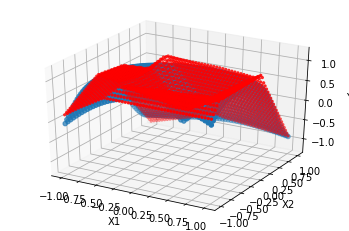

In [111]:
yout_0 = net_0.forward(xx)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout_0.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Similar network with relu activation

In [81]:
optimizer = tnn.Adam()

net_1 = tnn.AutoForm(new_layers=True)
layer1_1 = tnn.NonLinearLayer(2, n_hidden+1, activation=tnn.Relu(),
                          optimizer=optimizer)
layer2_1 = tnn.NonLinearLayer(n_hidden+1, n_hidden2+1, activation=tnn.Relu(),
                              optimizer=optimizer)
layer3_1 = tnn.LinearLayer(n_hidden2+1,1, optimizer=optimizer)

In [82]:
%matplotlib tk

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout_1 = net_1.forward(xx)
    dy = yout_1 - yy
    dx = net_1.backward(dy)
    
    net_1.update()
    
    ### Adding noise to the trained weights
#     if epoch%1000 == 0:
#         noise_old = 0.1
#         noise_old_w1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.weights.shape)
#         noise_old_b1 = np.random.normal(loc=0, scale=noise_old, size=layer1_0.bias.shape)

#         layer1_0.weights += noise_old_w1
#         layer1_0.bias += noise_old_b1

#         noise_old_w2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.weights.shape)
#         noise_old_b2 = np.random.normal(loc=0, scale=noise_old, size=layer2_0.bias.shape)

#         layer2_0.weights += noise_old_w2
#         layer2_0.bias += noise_old_b2
        
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout_1.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.38077025696607386


100 Error =  0.03273945268038742


200 Error =  0.011464111892858784


300 Error =  0.009169374244849066


400 Error =  0.00830527202258606


500 Error =  0.007898322260403205


600 Error =  0.0077018785401080005


700 Error =  0.007584466751616449


800 Error =  0.007510192080601106


900 Error =  0.007401852344182057


1000 Error =  0.0072731823900932255


1100 Error =  0.007222793738766197


1200 Error =  0.0071861603640157425


1300 Error =  0.0071603755492455545


1400 Error =  0.007141773946680758


1500 Error =  0.007120993670783838


1600 Error =  0.007102566279878648


1700 Error =  0.0070874081425447545


1800 Error =  0.007089225611688489


1900 Error =  0.007060876221991889


2000 Error =  0.007050053013847081


2100 Error =  0.00703166040688392


2200 Error =  0.007021649241680149


2300 Error =  0.007016349972091382


TclError: invalid command name "pyimage161"